## Average distance in unit square - via probability density function for the distance

In [1]:
import sympy
from sympy import *
x, y, s, sq = symbols('x y s sq', positive=True)

In [2]:
# probability density function for point x on a unit line (0..1)
# Note: declaring s as always positive above changes step function calculations below
jpd = Lambda(x, Heaviside(x) * Heaviside(1-x))
jpd

Lambda(x, Heaviside(1 - x))

In [3]:
# joint probability density function for 2 points x, y on a unit line (0..1)
jpd2 = jpd(x) * jpd(y)
jpd2

Heaviside(1 - x)*Heaviside(1 - y)

In [4]:
# probability of distance s = x-y (signed)
prob = Integral(jpd(x)*jpd(s+x),(x,0,1))
prob.doit().simplify()

(1 - s)*Heaviside(1 - s)

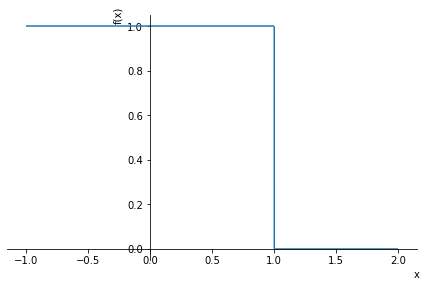

In [5]:
plot(jpd(x), (x,-1,2))

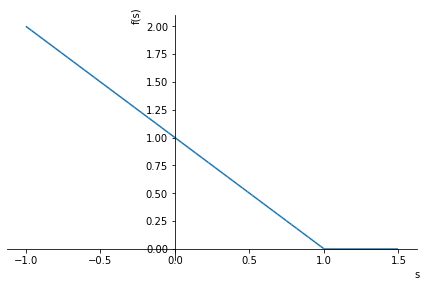

In [6]:
plot(prob.doit(), (s, -1, 1.5))

In [7]:
expand(prob.doit())

-s*Heaviside(1 - s) + Heaviside(1 - s)

In [8]:
prob

Integral(Heaviside(1 - x)*Heaviside(-s - x + 1), (x, 0, 1))

In [9]:
integrate(abs(x-y), (x,0,1), (y,0,1))

1/3

In [10]:
integrate((x-y)**2, (x,0,1), (y,0,1))

1/6

In [11]:
integrate(2*(1-s)*s, (s,0,1))

1/3

In [12]:
integrate(2*(1-s)*s**2, (s,0,1))

1/6

In [13]:
expand(prob.doit())

-s*Heaviside(1 - s) + Heaviside(1 - s)

In [14]:
prob_expanded = expand(prob.doit())

In [15]:
prob_expanded.subs(Heaviside(s)*Heaviside(-s),0)

-s*Heaviside(1 - s) + Heaviside(1 - s)

sympy cannot handle the step function very well. The end result here is that the probability density function of distance s on a unit interval is given by 2*(1-s). This is for un-signed s, hence the factor 2, because s can always be realized in two ways x-y or y-x.

In [16]:
# probability density of distance s on unit interval is given by:
PD = Lambda(s, 2*(1-s))
PD

Lambda(s, 2 - 2*s)

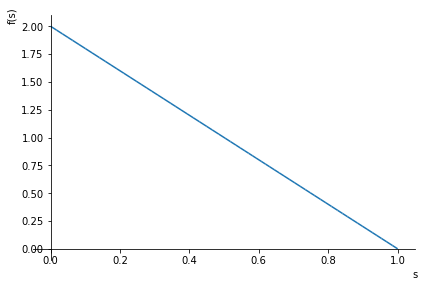

In [17]:
plot(PD(s), (s,0,1))

In [18]:
# calculate mean distance
MeanDistance = integrate(PD(s)*s, (s,0,1))
MeanDistance

1/3

In [19]:
# calculate variance
Variance = integrate(PD(s)*(s-MeanDistance)**2, (s,0,1))
Variance

1/18

In [20]:
# calculate standard deviation

In [21]:
StDev = sqrt(Variance)
StDev

sqrt(2)/6

In [22]:
StDev.evalf()

0.235702260395516

In [23]:
# calculate mean Square distance
MeanSquareDistance = integrate(PD(s)*s**2, (s,0,1))
MeanSquareDistance

1/6

Now determine the probability density of s^2. Follow theorem 14 (transformation of a random variable) in https://imai.fas.harvard.edu/teaching/files/Expectation.pdf

In [24]:
# Inverse of Square (inverse of mapping function)
SqMapInverse = Lambda(s, sqrt(s))
SqMapInverse

Lambda(s, sqrt(s))

In [25]:
# Probability density function of y = s^2
PD_Sq = Lambda(y, PD(SqMapInverse(y)) * (diff(SqMapInverse(y))))
PD_Sq

Lambda(y, (2 - 2*sqrt(y))/(2*sqrt(y)))

In [26]:
PD_Sq = PD_Sq.factor()
PD_Sq

Lambda(y, -1 + 1/sqrt(y))

In [27]:
# verify that total cumulative probability is 1
integrate(PD_Sq(y), (y,0,1))

1

In [28]:
# verify that mean value of y = s^2 is 1/6
integrate(PD_Sq(y)*y, (y,0,1))

1/6

In [29]:
# Variance of y = s^2
Variance_Sq = integrate(PD_Sq(y)*(y-MeanSquareDistance)**2, (y,0,1))
Variance_Sq

7/180

In [30]:
# standard deviation
StdDev_Sq = sqrt(Variance_Sq)
StdDev_Sq

sqrt(35)/30

In [31]:
StdDev_Sq.evalf()

0.197202659436654

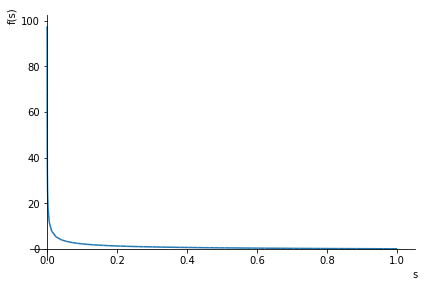

In [32]:
plot(PD_Sq(s), (s,0,1))

In [33]:
# Mean distance in unit square
MeanDist2 = integrate(sqrt(x + y)*PD_Sq(x)*PD_Sq(y), (x,0,1), (y,0,1)).doit()
MeanDist2

-13*sqrt(2)/30 - Integral(y*acosh(sqrt(y + 1)/sqrt(y)), (y, 0, 1)) + acosh(sqrt(2))/2 + 7/15 + Integral(sqrt(y)*acosh(sqrt(y + 1)/sqrt(y)), (y, 0, 1))

In [34]:
MeanDist2.evalf()

0.521405433164721

In [35]:
#MeanDist2.rewrite(log)

In [36]:
# Calculate probability density function of s^2 = x+y, where s is the two-dim distance
# Note that upper integration limit must be sq as square can never be negative, and
# more precisely, must be min(1,sq) as sq can be > 1 (< sqrt(2)), but argument of PD_Sq must be in 0..1
PD2_Sq = Lambda(sq, Integral(PD_Sq(x)*Heaviside(1-x)*PD_Sq(sq-x)*Heaviside(1-sq+x),(x,0,sq)).doit())
PD2_Sq

Lambda(sq, (-2*sqrt(sq) + sq - 2*sqrt(sq - 1) + 2*asin(sqrt(sq - 1)/sqrt(sq)) + 1)*Heaviside(1 - sq) - (sq - 4*sqrt(sq - 1) - 2*asin(1/sqrt(sq)) + 2*asin(sqrt(sq - 1)/sqrt(sq)) + 2)*Heaviside(2 - sq) - (2*sqrt(sq) - 2*sqrt(sq - 1) - (sq - 4*sqrt(sq - 1) - 2*asin(1/sqrt(sq)) + 2*asin(sqrt(sq - 1)/sqrt(sq)) + 2)*Heaviside(2 - sq) + 2*asin(sqrt(sq - 1)/sqrt(sq)) - pi + 1)*Heaviside(1 - sq))

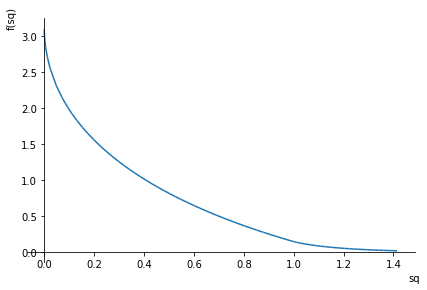

In [37]:
plot(PD2_Sq(sq), (sq,0,sqrt(2)))

In [38]:
print(PD2_Sq(1.4))
print(PD2_Sq(sqrt(2)))
print(PD2_Sq(sqrt(2)).evalf())

0.0156442162819812
-2 - sqrt(2) - 2*asin(2**(3/4)*sqrt(-1 + sqrt(2))/2) + 2*asin(2**(3/4)/2) + 4*sqrt(-1 + sqrt(2))
0.0143206220341877


In [39]:
# verify that total probability is 1
#integrate(PD2_Sq(sq), (sq,0,sqrt(2))).evalf()

In [40]:
# Transform PD2_Sq to PD2_S, with sqrt as mapping function
# Inverse of sqrt (inverse of mapping function)
SqrtMapInverse = Lambda(s, s**2)
SqrtMapInverse

Lambda(s, s**2)

In [41]:
# Probability density function of s = sqrt(sq)
PD2_S = Lambda(s, PD2_Sq(SqrtMapInverse(s)) * (diff(SqrtMapInverse(s))))
PD2_S

Lambda(s, 2*s*((s**2 - 2*s - 2*sqrt(s**2 - 1) + 2*asin(sqrt(s**2 - 1)/s) + 1)*Heaviside(1 - s**2) - (s**2 - 4*sqrt(s**2 - 1) - 2*asin(1/s) + 2*asin(sqrt(s**2 - 1)/s) + 2)*Heaviside(2 - s**2) - (2*s - 2*sqrt(s**2 - 1) - (s**2 - 4*sqrt(s**2 - 1) - 2*asin(1/s) + 2*asin(sqrt(s**2 - 1)/s) + 2)*Heaviside(2 - s**2) + 2*asin(sqrt(s**2 - 1)/s) - pi + 1)*Heaviside(1 - s**2)))

In [42]:
PD2_S(sqrt(2))

0

In [43]:
PD2_S(1)

-6 + 2*pi

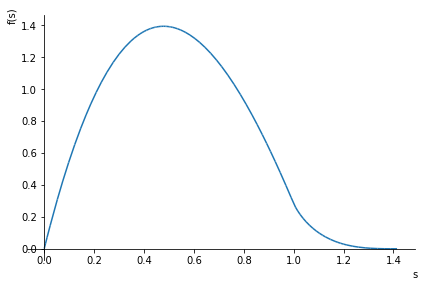

In [44]:
plot(PD2_S(s), (s,0,sqrt(2)))

In [45]:
PD2_S.expand(s)

Lambda(s, 2*s**3*Heaviside(1 - s**2)*Heaviside(2 - s**2) + 2*s**3*Heaviside(1 - s**2) - 2*s**3*Heaviside(2 - s**2) - 8*s**2*Heaviside(1 - s**2) - 8*s*sqrt(s**2 - 1)*Heaviside(1 - s**2)*Heaviside(2 - s**2) + 8*s*sqrt(s**2 - 1)*Heaviside(2 - s**2) - 4*s*Heaviside(1 - s**2)*Heaviside(2 - s**2)*asin(1/s) + 4*s*Heaviside(1 - s**2)*Heaviside(2 - s**2)*asin(sqrt(s**2 - 1)/s) + 4*s*Heaviside(1 - s**2)*Heaviside(2 - s**2) + 2*pi*s*Heaviside(1 - s**2) + 4*s*Heaviside(2 - s**2)*asin(1/s) - 4*s*Heaviside(2 - s**2)*asin(sqrt(s**2 - 1)/s) - 4*s*Heaviside(2 - s**2))

In [46]:
PD2_S.simplify()

Lambda(s, -2*s*(-(s**2 - 2*s - 2*sqrt(s**2 - 1) + 2*asin(sqrt(s**2 - 1)/s) + 1)*Heaviside(1 - s**2) + (s**2 - 4*sqrt(s**2 - 1) - 2*asin(1/s) + 2*asin(sqrt(s**2 - 1)/s) + 2)*Heaviside(2 - s**2) + (2*s - 2*sqrt(s**2 - 1) - (s**2 - 4*sqrt(s**2 - 1) - 2*asin(1/s) + 2*asin(sqrt(s**2 - 1)/s) + 2)*Heaviside(2 - s**2) + 2*asin(sqrt(s**2 - 1)/s) - pi + 1)*Heaviside(1 - s**2)))

In [49]:
# Probability density for s < 1 (step function is 1 everywhere)
PD2_Sa = Lambda(s, PD2_S(s).subs(Heaviside(1-s**2),1).expand())
PD2_Sa

Lambda(s, 2*s**3 - 8*s**2 + 2*pi*s)

In [50]:
# Probability density for s > 1 (step function is 0 for s < 1, and 1 for s > 1)
PD2_Sb = Lambda(s, PD2_S(s).subs(Heaviside(1-s**2),0).subs(Heaviside(2-s**2),1).expand())
PD2_Sb

Lambda(s, -2*s**3 + 8*s*sqrt(s**2 - 1) + 4*s*asin(1/s) - 4*s*asin(sqrt(s**2 - 1)/s) - 4*s)

In [51]:
# probability of length s < 1:
ProbSa = integrate(PD2_Sa(s), (s,0,1))
ProbSa

-13/6 + pi

In [52]:
# probability of length s > 1:
ProbSb = integrate(PD2_Sb(s), (s,1,sqrt(2)))
ProbSb

19/6 - pi

In [53]:
# total probability should be 1
ProbSa + ProbSb

1

In [54]:
PD2_Sa(1)

-6 + 2*pi

In [55]:
PD2_Sb(1)

-6 + 2*pi

In [56]:
PD2_Sb(sqrt(2))

0

In [57]:
MeanLength_Sa = integrate(PD2_Sa(s)*s, (s,0,1))
MeanLength_Sa 

-8/5 + 2*pi/3

In [58]:
MeanLength_Sb = integrate(PD2_Sb(s)*s, (s,1,sqrt(2)))
MeanLength_Sb 

-2*pi/3 + sqrt(2)/15 + acosh(sqrt(2))/3 + 26/15

In [59]:
MeanLength_S = MeanLength_Sa + MeanLength_Sb
MeanLength_S 

sqrt(2)/15 + 2/15 + acosh(sqrt(2))/3

In [60]:
MeanLength_S.evalf()

0.521405433164721

In [61]:
MeanLength_S.rewrite(log).simplify()

sqrt(2)/15 + 2/15 + log(1 + sqrt(2))/3

In [67]:
MeanSquare_Sa = integrate(PD2_Sa(s)*s**2, (s,0,1))
MeanSquare_Sa 

-19/15 + pi/2

In [68]:
MeanSquare_Sb = integrate(PD2_Sb(s)*s**2, (s,1,sqrt(2)))
MeanSquare_Sb 

8/5 - pi/2

In [71]:
MeanSquare_S = MeanSquare_Sa + MeanSquare_Sb
MeanSquare_S

1/3

In [73]:
MeanSquare_S.evalf()

0.333333333333333

In [84]:
Variance_S = (MeanSquare_S - MeanLength_S**2)
Variance_S

1/3 - (sqrt(2)/15 + 2/15 + acosh(sqrt(2))/3)**2

In [85]:
Variance_S.evalf()

0.0614697075996433

In [100]:
expr = Variance_S.rewrite(log).expand().simplify().collect(log(1+sqrt(2)))
expr

(-4/45 - 2*sqrt(2)/45)*log(1 + sqrt(2)) - log(1 + sqrt(2))**2/9 - 4*sqrt(2)/225 + 23/75

In [99]:
expand_log(log((1+sqrt(2))**2))

2*log(1 + sqrt(2))

In [105]:
expand_log(Variance_S.rewrite(log)).simplify().expand()

-log(1 + sqrt(2))**2/9 - 4*log(1 + sqrt(2))/45 - 2*sqrt(2)*log(1 + sqrt(2))/45 - 4*sqrt(2)/225 + 23/75